In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import sys
# simluated historical tqqq returns: https://www.portfoliovisualizer.com/backtest-portfolio?s=y&timePeriod=2&startYear=1994&firstMonth=3&endYear=2022&lastMonth=12&calendarAligned=true&includeYTD=true&initialAmount=10000&annualOperation=1&annualAdjustment=100&inflationAdjusted=true&annualPercentage=0.0&frequency=2&rebalanceType=1&absoluteDeviation=5.0&relativeDeviation=25.0&leverageType=1&leverageRatio=200.0&debtAmount=0&debtInterest=3.5&maintenanceMargin=25.0&leveragedBenchmark=false&reinvestDividends=true&showYield=false&showFactors=false&factorModel=3&benchmark=-1&benchmarkSymbol=SPY&portfolioNames=true&portfolioName1=sim-TQQQ&portfolioName2=Portfolio+2&portfolioName3=Portfolio+3&symbol1=RYOCX&allocation1_1=100

trading_days_per_year = 252
years = 10
num_simulations = 10000
# max_daily_return = 0.1 # 10%

sims = []
for simulation_num in range(num_simulations):
  print(f"\rSimulation Number {simulation_num}",end="")
  sys.stdout.flush()
  num_points = trading_days_per_year*years
  xx = [xxx for xxx in range(num_points)]
  y_start = 1
  yy = [y_start]
  tqqq_yy = [y_start]
  for ii in range(len(xx) - 1):
    # prcnt_move = random.betavariate(1, 16)*max_daily_return
    prcnt_move = random.normalvariate(1.0004439905289793, 0.017469020631209232) - 1 # historical distribution of daily QQQ returns since April 1999
    # if random.random() < 0.5: # eliminate upward bias in daily return distribution
      # prcnt_move = 1/(prcnt_move + 1) - 1
    yy.append(yy[ii]*(1 + prcnt_move))
    tqqq_yy.append(tqqq_yy[ii]*(1. + 3*prcnt_move))
  sims.append({'xx':xx, 'qqq':yy, 'tqqq':tqqq_yy, 'qqq_return':yy[-1]/yy[0] - 1.0, 'tqqq_return':tqqq_yy[-1]/tqqq_yy[0] - 1.0})
print()
  
sims.sort(key = lambda ii : ii['qqq_return'])

def myplot(label, sim):
  xx, yy, tqqq_yy, qqq_ret, tqqq_ret = [ii for ii in sim.values()]
  print(label, f'| QQQ Return: {qqq_ret*100:.2f}%', f'| TQQQ Return: {tqqq_ret*100:.2f}%')

  fig = plt.figure()
  ax0 = plt.axes()
  ax0.plot(xx, yy, label='QQQ')
  buffer1 = max(max(tqqq_yy) - 1.1*y_start, 1.1*y_start - min(tqqq_yy))
  buffer2 = max(max(yy) - 1.1*y_start, 1.1*y_start - min(yy))
  buffer = max(buffer1, buffer2)
  ax0.plot(xx, tqqq_yy, label='TQQQ')
  ax0.legend()
  plt.ylim(y_start - buffer, y_start + buffer)
  ax1 = ax0.twinx()
  ax1.set_ylim(ax0.get_ylim())
  plt.show()

In [5]:
tqqq_cnt = 0
qqq_cnt = 0
for sim in sims:
  if sim['tqqq_return'] > sim['qqq_return']:
    tqqq_cnt += 1
  else:
    qqq_cnt += 1
print(f"TQQ Outperformed {tqqq_cnt/(tqqq_cnt + qqq_cnt)*100:.2f}% of the time!")

TQQ Outperformed 31.50% of the time!


Best | QQQ Return: 4912.98% | TQQQ Return: 1329019.25%


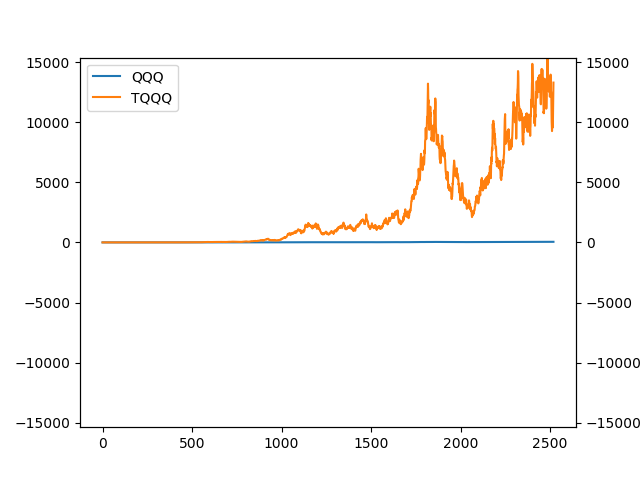

90th Percentile | QQQ Return: 534.90% | TQQQ Return: 2139.56%


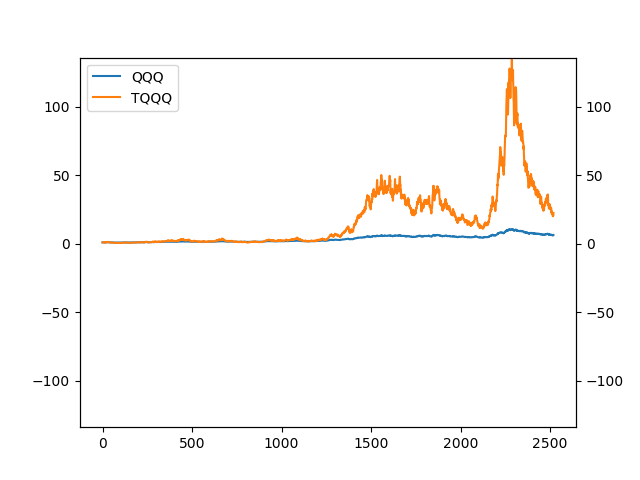

80th Percentile | QQQ Return: 335.16% | TQQQ Return: 722.14%


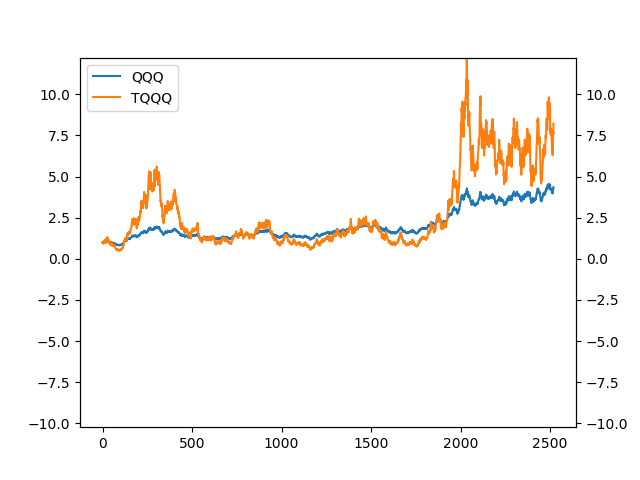

70th Percentile | QQQ Return: 230.78% | TQQQ Return: 256.96%


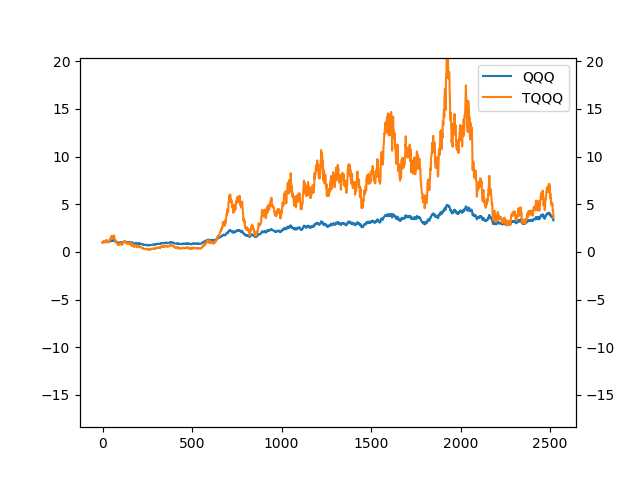

60th Percentile | QQQ Return: 158.96% | TQQQ Return: 73.32%


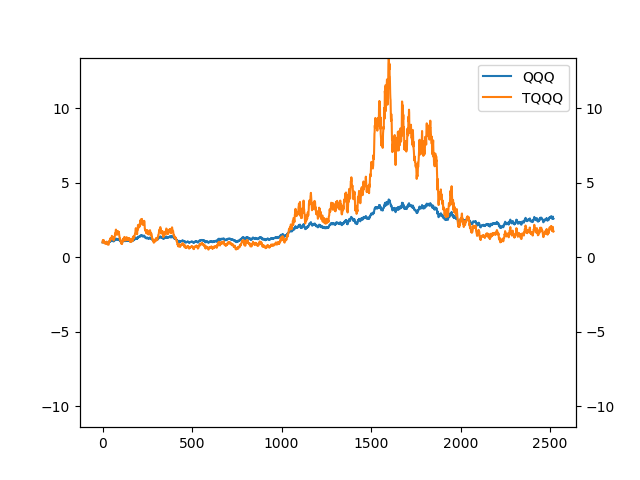

Median | QQQ Return: 106.70% | TQQQ Return: -7.82%


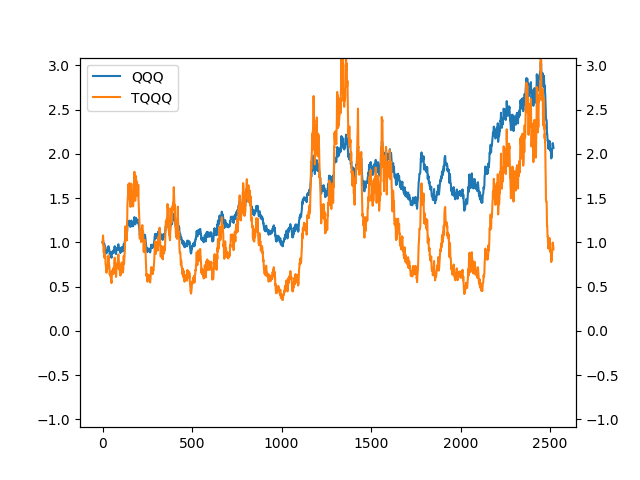

40th Percentile | QQQ Return: 66.51% | TQQQ Return: -53.09%


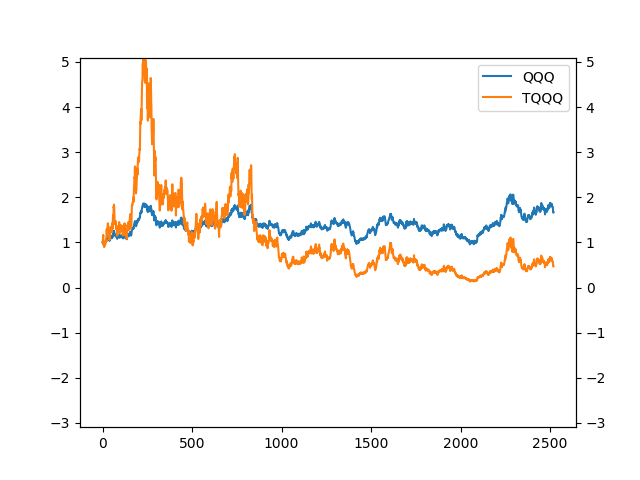

30th Percentile | QQQ Return: 31.61% | TQQQ Return: -77.14%


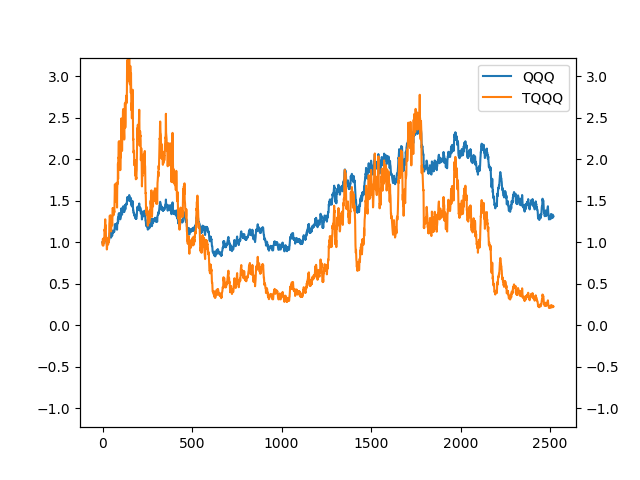

20th Percentile | QQQ Return: -1.65% | TQQQ Return: -91.10%


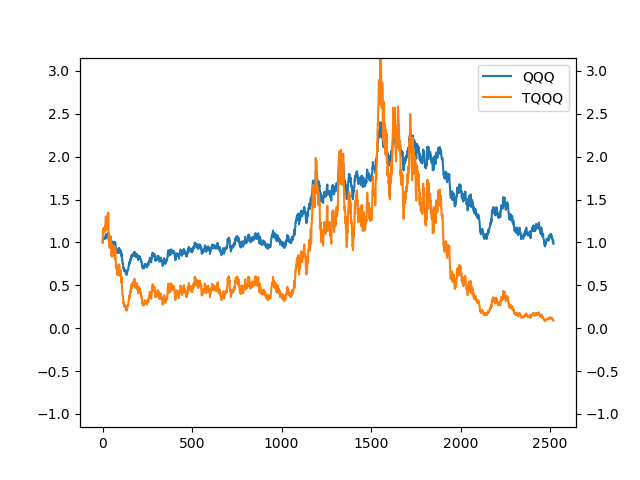

10th Percentile | QQQ Return: -33.82% | TQQQ Return: -96.98%


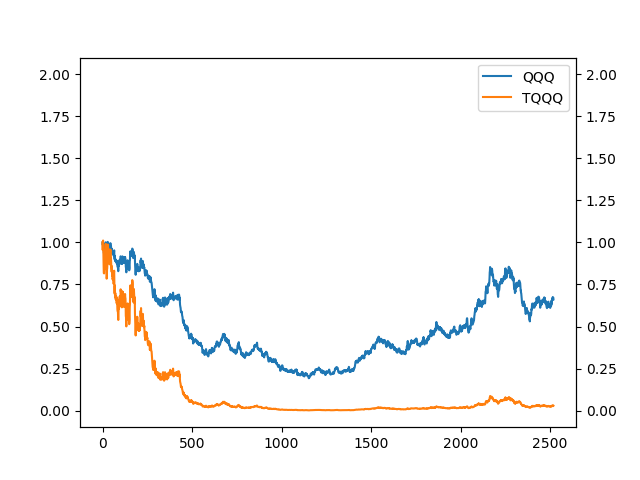

Worst | QQQ Return: -90.91% | TQQQ Return: -99.99%


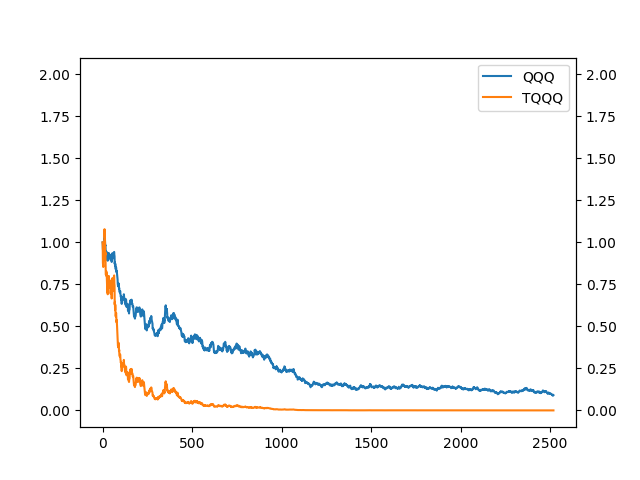

In [2]:
myplot("Best",            sims[-1])
myplot("90th Percentile", sims[9*len(sims)//10])
myplot("80th Percentile", sims[8*len(sims)//10])
myplot("70th Percentile", sims[7*len(sims)//10])
myplot("60th Percentile", sims[6*len(sims)//10])
myplot("Median",          sims[5*len(sims)//10])
myplot("40th Percentile", sims[4*len(sims)//10])
myplot("30th Percentile", sims[3*len(sims)//10])
myplot("20th Percentile", sims[2*len(sims)//10])
myplot("10th Percentile", sims[1*len(sims)//10])
myplot("Worst",           sims[0])